
# Analysis of Nuclei Properties
*** Use Batch_analysis.py for analysis nuclei first

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from skimage.measure import label, regionprops, regionprops_table
import utils.metrics
##import utils.model_builder
import tensorflow as tf
import keras
import seaborn as sb
from analysis import analysis
from config import config_vars

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
cwd = os.getcwd()
print(cwd)

/mnt/mbi/images/saunders/e0031038/unet4nuclei


In [3]:
path = "/src/experiments/12/csv/"
file_path = cwd + path

 # Get the files that you want to analyse

files = []
for r, d, f in os.walk(cwd+ path):
    print(f)
    files = f
files.sort()
n_files = len(files)
print(n_files)zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

Read the CSV file containing the nuclei properties generated by analysis.py

In [4]:
dic = {}
keys=[]
for i in range(301,321):
        for j in range(20, 26):
            key = (i,j)
            keys.append(key)
        ##dic[key]= pd.DataFrame(analysis(file_name))
            dic[key]= pd.read_csv (file_path + 'movie_2_nucleus_working_raw_t'+ str(i)+ "_z0" + str(j)+ '_3')


Export DataFrames to CSV files for future use **Very important in case you accidentally clear the memory or the server crash

export_path = ""
for key in keys:
    print(export_path)
    dic[key].to_csv (export_path + str(key), index = False, header=True)

In [5]:
master_df = pd.DataFrame()
for key in keys:
    dic[key] = dic[key][(dic[key]!= 0).all(1)] ##removes 0 values 
    temp = dic[key]
    temp["major_minor_ratio"] = np.divide(temp['major_axis_length'],temp['minor_axis_length'])
    #temp["time_point"] = key ##record which slice that data is from
    eesp = temp.copy()
    master_df = pd.concat([master_df,temp], ignore_index=True)

## Correcting the ellispe major and minor that is not uniform accross the Z dimension

In [6]:
dic_z ={}
key_z ={}

for key in dic:

    if key[0] in dic_z.keys() and dic[key]["major_minor_ratio"].mean() > dic_z[key[0]]:
        dic_z[key[0]] = dic[key]["major_minor_ratio"].mean()
    elif key[0] not in dic_z.keys():
        dic_z[key[0]] = dic[key]["major_minor_ratio"].mean()
    
    else:
        continue
    
dic_z

{301: 4.155003565472284,
 302: 4.2207608752816785,
 303: 3.9373402438427676,
 304: 4.044383105171484,
 305: 3.99343013466078,
 306: 4.621369534841558,
 307: 4.289621231482405,
 308: 4.164203944590543,
 309: 4.225792355560961,
 310: 4.272571851157739,
 311: 4.377741363604211,
 312: 3.834386302867626,
 313: 4.132385454721851,
 314: 4.367259055903751,
 315: 4.171927921232429,
 316: 4.106044460800172,
 317: 3.8469103953000046,
 318: 3.972203479749877,
 319: 4.046684501255794,
 320: 4.118292706002845}

In [7]:
dic_z2 ={}
for key in dic:
    if key[0] in dic_z2.keys():
        dic_z2[key[0]].append(dic[key]["major_minor_ratio"].mean())
    else:
        dic_z2[key[0]] = [(dic[key]["major_minor_ratio"].mean())]
dic_z2

{301: [4.155003565472284,
  3.731955967594215,
  3.5386476663146427,
  3.7438176963852263,
  3.7073295926621164,
  3.9983500263340988],
 302: [3.85681790391429,
  3.557202399594495,
  3.571775193389449,
  4.130502828730652,
  4.2207608752816785,
  3.9545664508998284],
 303: [3.817752555455068,
  3.9373402438427676,
  3.6232538891350163,
  3.619613750331851,
  3.6779967504118543,
  3.4975473707441345],
 304: [3.892718793705136,
  3.4848533828712887,
  3.5707914460472163,
  4.044383105171484,
  3.9528310474930586,
  4.036400442017438],
 305: [3.99343013466078,
  3.887491244858728,
  3.4725746927682124,
  3.9393328756809916,
  3.7372989944557458,
  3.46553592272163],
 306: [3.6546166340371276,
  3.642324770535482,
  4.150512991783988,
  3.8730034401453413,
  4.621369534841558,
  4.043664897696657],
 307: [4.0065948259369755,
  4.039470020486346,
  3.8231786752540056,
  3.95455646492916,
  4.289621231482405,
  4.050628130983112],
 308: [3.6960210612514772,
  3.938566312542262,
  3.37678511

# Visualising the Data

## Covert dictionary to pandas Dataframe

In [10]:

##master_df3 = pd.DataFrame(columns=["time", "major_minor_ratio"]) ##Create a master dataframe that contains all the data
lst=[]
for key in dic_z2:
    for i in dic_z2[key]:
        lst.append([key,i])              
master_df3 = pd.DataFrame(lst,columns=["time_point", "major_minor_ratio"])
master_df3

[[301, 4.155003565472284], [301, 3.731955967594215], [301, 3.5386476663146427], [301, 3.7438176963852263], [301, 3.7073295926621164], [301, 3.9983500263340988], [302, 3.85681790391429], [302, 3.557202399594495], [302, 3.571775193389449], [302, 4.130502828730652], [302, 4.2207608752816785], [302, 3.9545664508998284], [303, 3.817752555455068], [303, 3.9373402438427676], [303, 3.6232538891350163], [303, 3.619613750331851], [303, 3.6779967504118543], [303, 3.4975473707441345], [304, 3.892718793705136], [304, 3.4848533828712887], [304, 3.5707914460472163], [304, 4.044383105171484], [304, 3.9528310474930586], [304, 4.036400442017438], [305, 3.99343013466078], [305, 3.887491244858728], [305, 3.4725746927682124], [305, 3.9393328756809916], [305, 3.7372989944557458], [305, 3.46553592272163], [306, 3.6546166340371276], [306, 3.642324770535482], [306, 4.150512991783988], [306, 3.8730034401453413], [306, 4.621369534841558], [306, 4.043664897696657], [307, 4.0065948259369755], [307, 4.0394700204863

,time_point,major_minor_ratio
0,301,4.155004
1,301,3.731956
2,301,3.538648
3,301,3.743818
4,301,3.707330
...,...,...
115,320,3.681078
116,320,4.012719
117,320,4.005176
118,320,3.868180


In [11]:
dic2 = {}
keys_2=[]
for i in range(301, 321):
    key = i
    #print(key)
    keys_2.append(key)
    ##dic[key]= pd.DataFrame(analysis(file_name))
    file_name = str('movie_2_nucleus_working_raw_t'+str(i)+"_z020")
    dic2[key]= pd.read_csv (file_path +file_name)

## Looking at the general info the dataframe

In [12]:
master_df2 = pd.DataFrame()
for key in keys_2:
    dic2[key] = dic2[key][(dic2[key]!= 0).all(1)] ##removes 0 values 
    temp = dic2[key]
    temp["time_point"] = key ##record which slice that data is from
    master_df2 = pd.concat([master_df2,temp], ignore_index=True)
master_df2["major_minor_ratio"] = np.divide(master_df2['major_axis_length'],master_df2['minor_axis_length'])    
master_df2.describe(include= 'all')

,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,time_point,major_minor_ratio
count,12153.00000,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000
mean,414.63507,446.175759,0.258096,11.523240,4.946228,309.999918,3.616545
std,141.81217,194.935166,1.011056,10.885302,6.685436,5.690872,2.206070
min,54.00000,1.000000,-1.570796,2.000000,0.757483,301.000000,1.000000
25%,299.00000,287.000000,-0.745709,3.677089,1.046744,305.000000,1.783680
50%,420.00000,451.000000,0.491397,6.414371,1.885618,310.000000,3.111903
75%,533.00000,607.000000,1.196607,15.057156,5.433859,315.000000,4.391067
max,670.00000,766.000000,1.570796,78.356504,38.762628,320.000000,21.614194


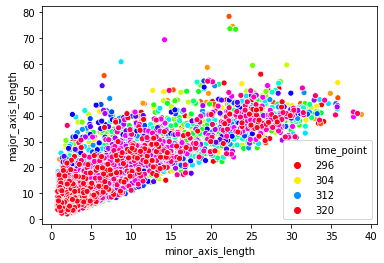

In [13]:
sb.scatterplot(x= 'minor_axis_length', y = "major_axis_length",hue ='time_point', data =master_df2 ,palette = "hsv")

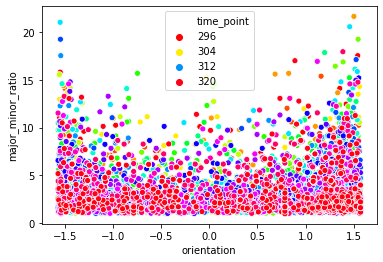

In [14]:
sb.scatterplot(x= 'orientation', y = "major_minor_ratio",hue ='time_point', data =master_df2[master_df2['time_point'] >= 11],palette = "hsv")

## Looking at orientation of the nucleis

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


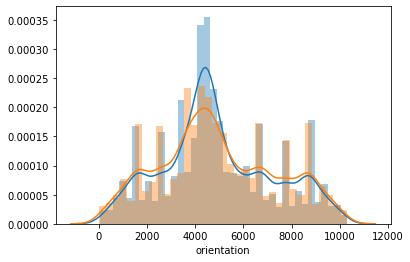

In [23]:
import math
i = 0
while i < len(master_df['orientation']):
    
    if master_df['orientation'][i] < 0:
        master_df['orientation'][i] = master_df['orientation'][i] + math.pi
    master_df['orientation'][i] = math.degrees(master_df['orientation'][i])
    i = i +1

i = 0
while i < len(master_df2['orientation']):
    if master_df2['orientation'][i] < 0:
        master_df2['orientation'][i] = master_df2['orientation'][i] + math.pi
    master_df2['orientation'][i] = math.degrees(master_df2['orientation'][i])
    i = i +1
dist1, dist2 =sb.distributions.distplot(master_df['orientation'] ), sb.distributions.distplot(master_df2['orientation'])

In [ ]:
dist1, dist2 =sb.distributions.distplot(master_df['orientation'] ), sb.distributions.distplot(master_df2['orientation'])

## Looking at the min major axis ratio

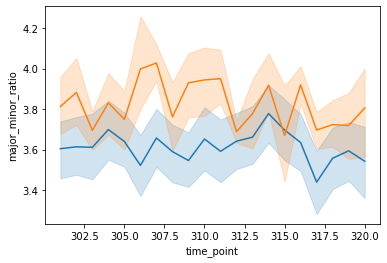

In [29]:
lp1, lp2 = sb.lineplot(x="time_point", y='major_minor_ratio', data=master_df2, ci=90), sb.lineplot(x="time_point", y='major_minor_ratio', data=master_df3, estimator = "mean", ci=90)

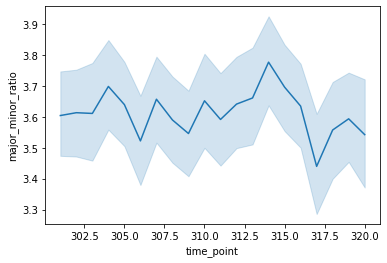

In [27]:
sb.lineplot(x="time_point", y='major_minor_ratio', data=master_df2,err_style = 'band', estimator = 'mean', ci=90)

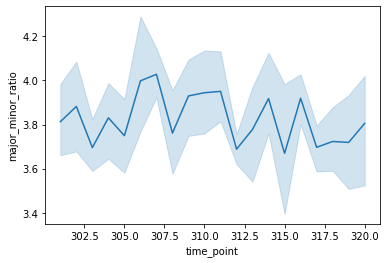

In [28]:
sb.lineplot(x="time_point", y='major_minor_ratio', data=master_df3, err_style = 'band', estimator = 'mean', ci=95)

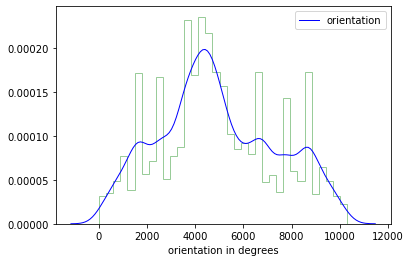

In [25]:
x1 = pd.Series(master_df2['orientation'], name="orientation in degrees")
sb.distplot(x1, kde_kws={"color": "b", "lw": 1, 'label':  "orientation"}, hist_kws={"histtype": "step", "linewidth": 1, "color": "g"})

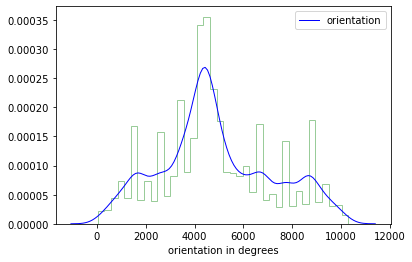

In [26]:
x2 = pd.Series(master_df['orientation'], name="orientation in degrees")
sb.distplot(x2,kde_kws={"color": "b", "lw": 1, 'label': "orientation"}, hist_kws={"histtype": "step", "linewidth": 1, "color": "g"})